# Простой анализ данных

Студент: Белянинов Илья Витальевич\
Группа: ПМ22-1

## Задания для самостоятельного решения

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Загрузите данные по вариантам в ноутбук.

In [2]:
df = pd.read_excel('Вариант 3.xlsx', skiprows = 2, skipfooter=1)
df

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1,152,11,М,333,----001---00---000--1-+0---,0(3)0(3)0(3)0(3)0(3),NaN,3,10,36
1,2,140,12,Ж,332,----100---01-+-000--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,4,14,36
2,3,137,11,М,328,--+-010---00---101--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5,17,36
3,4,148,11,М,333,-+--000--+01---100--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5,17,36
4,5,153,11,Ж,333,-+--100---00---100-+0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5,17,36
...,...,...,...,...,...,...,...,...,...,...,...
1175,1176,148,11,М,332,++++222+++22+++222++2++2+++,3(3)3(3)3(3)3(3)2(3),NaN,51,98,36
1176,1177,148,11,М,330,++++222+++22+++222++2++2+++,3(3)3(3)3(3)3(3)2(3),NaN,51,98,36
1177,1178,152,11,Ж,330,++++222+++22+++222++2++2+++,3(3)3(3)3(3)2(3)3(3),NaN,51,98,36
1178,1179,147,11,М,332,++++222+++22+++222++2++2+++,3(3)3(3)3(3)3(3)3(3),NaN,52,100,36


### 2. Сделайте описательную статистику полученных данных.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   №                              1180 non-null   int64  
 1   № школы                        1180 non-null   int64  
 2   Класс                          1180 non-null   object 
 3   Пол                            1180 non-null   object 
 4   Номер варианта                 1180 non-null   int64  
 5   Задания с кратким ответом      1180 non-null   object 
 6   Задания с развёрнутым ответом  1180 non-null   object 
 7   Устная часть                   0 non-null      float64
 8   Первичный балл                 1180 non-null   int64  
 9   Балл                           1180 non-null   int64  
 10  Минимальный балл               1180 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 101.5+ KB


In [4]:
descr = df.describe()
descr

,№,№ школы,Номер варианта,Устная часть,Первичный балл,Балл,Минимальный балл
count,1180.000000,1180.000000,1180.000000,0.0,1180.000000,1180.000000,1180.0
mean,590.500000,141.312712,329.559322,NaN,23.699153,52.047458,36.0
std,340.780966,30.796792,39.578149,NaN,10.480897,14.965477,0.0
min,1.000000,111.000000,101.000000,NaN,3.000000,10.000000,36.0
25%,295.750000,133.000000,329.000000,NaN,15.000000,41.000000,36.0
50%,590.500000,146.000000,330.000000,NaN,22.000000,49.000000,36.0
75%,885.250000,152.000000,332.000000,NaN,31.250000,60.250000,36.0
max,1180.000000,1106.000000,506.000000,NaN,52.000000,100.000000,36.0


### 3. Найдите процент учащихся, выполнивших работу ниже среднего.

In [5]:
print(f"Процент учащихся, выполнивших работу ниже среднего - {round(len(df.loc[df['Балл'] < df['Балл'].mean()]) / len(df) * 100, 4)} %")

Процент учащихся, выполнивших работу ниже среднего - 56.2712 %


### 4. Найти процент учащихся не сдавших экзамен.

In [6]:
print(f"Процент учащихся не сдавших экзамен - {round(len(df.loc[df['Балл'] < df['Минимальный балл'].mean()]) / len(df) * 100, 4)} %")

Процент учащихся не сдавших экзамен - 7.7119 %


5. Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.

In [7]:
data = {'Экзамен': ['Не сдал', 'Сдал'],
        'Проценты':[len(df.loc[df['Балл'] < df['Минимальный балл'].mean()]) / len(df) * 100,
                    len(df.loc[df['Балл'] > df['Минимальный балл'].mean()]) / len(df) * 100]}
df_1 = pd.DataFrame(data)
df_1

,Экзамен,Проценты
0,Не сдал,7.711864
1,Сдал,89.745763


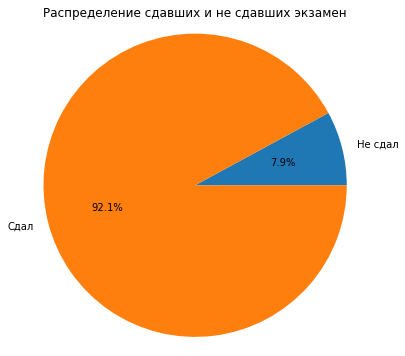

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(df_1['Проценты'], labels=df_1['Экзамен'], autopct='%1.1f%%')
ax.set_title('Распределение сдавших и не сдавших экзамен')

plt.axis('equal')

plt.show()

### 6. Постройте ядерную оценку плотности распределению баллов за экзамен.

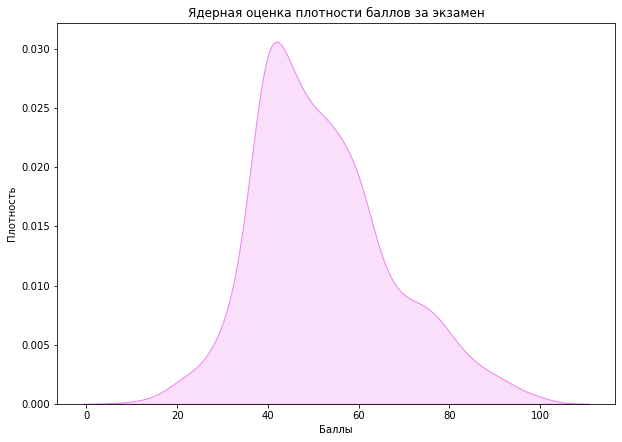

In [9]:
plt.figure(figsize=(10, 7))
sns.kdeplot(df['Балл'],  color='violet', fill = True)
plt.title('Ядерная оценка плотности баллов за экзамен')
plt.xlabel('Баллы')
plt.ylabel('Плотность')
plt.show()

### 7. Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

In [10]:
def mark(points):
    if points >= 86:
        return 'Отлично'
    elif points >= 70 and points < 86:
        return 'Хорошо'
    elif points >= 50 and points < 70:
        return 'Удовлетворительно'
    else:
        return 'Неудовлетворительно'
    
df['Оценка'] = df['Балл'].apply(lambda x: mark(x))
percent_marks = df['Оценка'].value_counts(normalize=True) * 100
print(percent_marks)

Неудовлетворительно    50.423729
Удовлетворительно      35.169492
Хорошо                 11.440678
Отлично                 2.966102
Name: Оценка, dtype: float64


### 8. Какое процентное соотношение юношей и девушек писало данный экзамен?

In [11]:
percent_genders = df['Пол'].value_counts(normalize=True) * 100
print(percent_genders)

М    68.644068
Ж    31.355932
Name: Пол, dtype: float64


### 9. Сколько школ принимало участие в экзамене?

In [12]:
count_schools = df['№ школы'].nunique()
print(count_schools)

19


### 10. Сколько всего заданий с кратким ответом? С развернутым ответом?

In [13]:
print(f"Задания с кратким ответом - {len(df['Задания с кратким ответом'][0])}")
print(f"Задания с развёрнутым ответом - {df['Задания с развёрнутым ответом'][0].count(')')}")

Задания с кратким ответом - 27
Задания с развёрнутым ответом - 5


### 11. Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В, ... Вк. Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.

In [14]:
_dict = {}
for i in range(len(df['Задания с кратким ответом'])):
    for ind, symb in enumerate(df['Задания с кратким ответом'][i]):
        if symb == '+':
            _dict[ind] = _dict.get(ind, 0) + 1
            
_dict = dict(sorted(_dict.items()))
print(_dict)

for i, j in _dict.items():
    print(f'Процент выполнения задания B{i+1} = {round(j / df.shape[0] * 100, 4)} %')

{0: 1007, 1: 1025, 2: 734, 3: 525, 7: 774, 8: 873, 9: 413, 12: 668, 13: 602, 14: 502, 18: 967, 19: 886, 21: 599, 22: 732, 24: 353, 25: 436, 26: 351}
Процент выполнения задания B1 = 85.339 %
Процент выполнения задания B2 = 86.8644 %
Процент выполнения задания B3 = 62.2034 %
Процент выполнения задания B4 = 44.4915 %
Процент выполнения задания B8 = 65.5932 %
Процент выполнения задания B9 = 73.9831 %
Процент выполнения задания B10 = 35.0 %
Процент выполнения задания B13 = 56.6102 %
Процент выполнения задания B14 = 51.0169 %
Процент выполнения задания B15 = 42.5424 %
Процент выполнения задания B19 = 81.9492 %
Процент выполнения задания B20 = 75.0847 %
Процент выполнения задания B22 = 50.7627 %
Процент выполнения задания B23 = 62.0339 %
Процент выполнения задания B25 = 29.9153 %
Процент выполнения задания B26 = 36.9492 %
Процент выполнения задания B27 = 29.7458 %


### 12. Аналогично и с типом С (ответы с развернутым ответом)

In [15]:
C1 = []
C2 = []
C3 = []
C4 = []
C5 = []
for i in range(len(df['Задания с развёрнутым ответом'])):
    C1.append(df['Задания с развёрнутым ответом'][i][0])
    C2.append(df['Задания с развёрнутым ответом'][i][4])
    C3.append(df['Задания с развёрнутым ответом'][i][8])
    C4.append(df['Задания с развёрнутым ответом'][i][12])
    C5.append(df['Задания с развёрнутым ответом'][i][16])

df_C = pd.DataFrame()
df_C['C1'] = C1
df_C['C2'] = C2
df_C['C3'] = C3
df_C['C4'] = C4
df_C['C5'] = C5
df_C

,C1,C2,C3,C4,C5
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
1175,3,3,3,3,2
1176,3,3,3,3,2
1177,3,3,3,2,3
1178,3,3,3,3,3


In [16]:
C1 = df_C['C1'].value_counts(normalize=True) * 100
C1

0    82.372881
1    11.525424
2     3.983051
3     2.118644
Name: C1, dtype: float64

In [17]:
C2 = df_C['C2'].value_counts(normalize=True) * 100
C2

0    61.779661
1    16.101695
3    13.983051
2     8.135593
Name: C2, dtype: float64

In [18]:
C3 = df_C['C3'].value_counts(normalize=True) * 100
C3

0    83.644068
1     7.881356
3     6.525424
2     1.949153
Name: C3, dtype: float64

In [19]:
C4 = df_C['C4'].value_counts(normalize=True) * 100
C4

0    76.610169
1    19.830508
2     2.542373
3     1.016949
Name: C4, dtype: float64

In [20]:
C5 = df_C['C5'].value_counts(normalize=True) * 100
C5

0    68.220339
1    15.423729
3     9.661017
2     6.694915
Name: C5, dtype: float64

### 13) Сделайте анализ по двум школам:
#### 1. по всем выполненным заданиям типа В
#### 2. по заданиям типа С больше 50%
#### 3. по среднему баллу юношей и девушек


In [24]:
df_152 = df.loc[df['№ школы'] == 152].reset_index()
df_152

,index,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл,Оценка
0,0,1,152,11,М,333,----001---00---000--1-+0---,0(3)0(3)0(3)0(3)0(3),NaN,3,10,36,Неудовлетворительно
1,19,20,152,11,М,330,+---010---01---100--1--2---,0(3)0(3)0(3)0(3)0(3),NaN,7,23,36,Неудовлетворительно
2,22,23,152,11В,М,332,-+--000---00---111+-0--2---,0(3)0(3)0(3)0(3)0(3),NaN,7,23,36,Неудовлетворительно
3,33,34,152,11,М,330,----200---10---011--1--2---,0(3)0(3)0(3)0(3)0(3),NaN,8,27,36,Неудовлетворительно
4,56,57,152,11,М,331,++--100-+-20---100+-0--1---,0(3)0(3)0(3)0(3)0(3),NaN,9,30,36,Неудовлетворительно
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,1168,1169,152,11,М,332,++++222+++22+++222++2++1+++,2(3)3(3)3(3)2(3)2(3),NaN,48,92,36,Отлично
166,1169,1170,152,11,Ж,329,++++222+++22+++221++2++1+++,1(3)3(3)3(3)3(3)3(3),NaN,48,92,36,Отлично
167,1170,1171,152,11,Ж,329,++++222+++22+++221++2++1+++,3(3)3(3)3(3)1(3)3(3),NaN,48,92,36,Отлично
168,1174,1175,152,11,Ж,332,++++222+++22+++222++2++2+++,3(3)3(3)3(3)1(3)3(3),NaN,50,96,36,Отлично


In [25]:
def B_tasks(df):
    _dict = {}
    for i in range(len(df['Задания с кратким ответом'])):
        for ind, symb in enumerate(df['Задания с кратким ответом'][i]):
            if symb == '+':
                _dict[ind] = _dict.get(ind, 0) + 1

    _dict = dict(sorted(_dict.items()))
    print(_dict)

    for i, j in _dict.items():
        print(f'Процент выполнения задания B{i+1} = {round(j / df.shape[0] * 100, 4)} %')
B_tasks(df_152)

{0: 150, 1: 146, 2: 109, 3: 78, 7: 113, 8: 127, 9: 59, 12: 104, 13: 95, 14: 82, 18: 148, 19: 131, 21: 89, 22: 109, 24: 54, 25: 71, 26: 63}
Процент выполнения задания B1 = 88.2353 %
Процент выполнения задания B2 = 85.8824 %
Процент выполнения задания B3 = 64.1176 %
Процент выполнения задания B4 = 45.8824 %
Процент выполнения задания B8 = 66.4706 %
Процент выполнения задания B9 = 74.7059 %
Процент выполнения задания B10 = 34.7059 %
Процент выполнения задания B13 = 61.1765 %
Процент выполнения задания B14 = 55.8824 %
Процент выполнения задания B15 = 48.2353 %
Процент выполнения задания B19 = 87.0588 %
Процент выполнения задания B20 = 77.0588 %
Процент выполнения задания B22 = 52.3529 %
Процент выполнения задания B23 = 64.1176 %
Процент выполнения задания B25 = 31.7647 %
Процент выполнения задания B26 = 41.7647 %
Процент выполнения задания B27 = 37.0588 %


In [26]:
def C_tasks(df):
    C1 = []
    C2 = []
    C3 = []
    C4 = []
    C5 = []
    for i in range(len(df['Задания с развёрнутым ответом'])):
        C1.append(df['Задания с развёрнутым ответом'][i][0])
        C2.append(df['Задания с развёрнутым ответом'][i][4])
        C3.append(df['Задания с развёрнутым ответом'][i][8])
        C4.append(df['Задания с развёрнутым ответом'][i][12])
        C5.append(df['Задания с развёрнутым ответом'][i][16])

    df_C = pd.DataFrame()
    df_C['C1'] = C1
    df_C['C2'] = C2
    df_C['C3'] = C3
    df_C['C4'] = C4
    df_C['C5'] = C5
    return df_C
df_C_152 = C_tasks(df_152)
df_C_152 = df_C_152.astype(int)
df_C_152

,C1,C2,C3,C4,C5
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
165,2,3,3,2,2
166,1,3,3,3,3
167,3,3,3,1,3
168,3,3,3,1,3


In [27]:
df_C_152['Сумма'] = df_C_152.sum(axis=1)
df_C_152

,C1,C2,C3,C4,C5,Сумма
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
165,2,3,3,2,2,12
166,1,3,3,3,3,13
167,3,3,3,1,3,13
168,3,3,3,1,3,13


In [41]:
print(f"Получили больше 50% баллов по заданиям типа C - {round(len(df_C_152[df_C_152['Сумма'] > 3*5/2]) / len(df_C_152) * 100,4)}%")

Получили больше 50% баллов по заданиям типа C - 18.2353%


In [31]:
mean_points_man_152 = round(df_152[df_152['Пол'] == 'М']['Балл'].mean(),4)
mean_points_woman_152 = round(df_152[df_152['Пол'] == 'Ж']['Балл'].mean(),4)
print(f"Средний балл юношей - {mean_points_man_152}")
print(f"Средний балл девушек - {mean_points_woman_152}")

Средний балл юношей - 53.8992
Средний балл девушек - 58.1176


In [32]:
df_147 = df.loc[df['№ школы'] == 147].reset_index()
df_147

,index,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл,Оценка
0,114,115,147,11,Ж,329,++--002+++10--+000+-1--0---,0(3)0(3)0(3)0(3)0(3),NaN,11,36,36,Неудовлетворительно
1,156,157,147,11,М,330,++--000-+-20---200+-2--2---,0(3)0(3)0(3)0(3)0(3),NaN,12,38,36,Неудовлетворительно
2,204,205,147,11А,М,328,++--201-+-10---102--1--2---,0(3)0(3)0(3)0(3)0(3),NaN,13,39,36,Неудовлетворительно
3,267,268,147,11М,Ж,329,++--112+--00---001++2--1--+,0(3)0(3)0(3)0(3)0(3),NaN,14,40,36,Неудовлетворительно
4,268,269,147,11,М,333,++--110---10--+100++1++1---,0(3)0(3)0(3)0(3)1(3),NaN,14,40,36,Неудовлетворительно
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,1139,1140,147,11,Ж,332,+++-222+++22+++122++2++2+++,1(3)2(3)3(3)0(3)3(3),NaN,44,84,36,Хорошо
63,1154,1155,147,11,Ж,333,++++222+++12-++122++2++2+++,2(3)3(3)3(3)1(3)3(3),NaN,46,88,36,Отлично
64,1165,1166,147,11,Ж,330,++++222+++22+++222++2++2+++,1(3)3(3)3(3)1(3)3(3),NaN,48,92,36,Отлично
65,1172,1173,147,11,М,328,++++222+++22+++222++2++2+++,2(3)2(3)3(3)2(3)3(3),NaN,49,94,36,Отлично


In [33]:
B_tasks(df_147)

{0: 66, 1: 63, 2: 43, 3: 37, 7: 48, 8: 58, 9: 34, 12: 45, 13: 43, 14: 42, 18: 60, 19: 55, 21: 46, 22: 47, 24: 28, 25: 32, 26: 31}
Процент выполнения задания B1 = 98.5075 %
Процент выполнения задания B2 = 94.0299 %
Процент выполнения задания B3 = 64.1791 %
Процент выполнения задания B4 = 55.2239 %
Процент выполнения задания B8 = 71.6418 %
Процент выполнения задания B9 = 86.5672 %
Процент выполнения задания B10 = 50.7463 %
Процент выполнения задания B13 = 67.1642 %
Процент выполнения задания B14 = 64.1791 %
Процент выполнения задания B15 = 62.6866 %
Процент выполнения задания B19 = 89.5522 %
Процент выполнения задания B20 = 82.0896 %
Процент выполнения задания B22 = 68.6567 %
Процент выполнения задания B23 = 70.1493 %
Процент выполнения задания B25 = 41.791 %
Процент выполнения задания B26 = 47.7612 %
Процент выполнения задания B27 = 46.2687 %


In [34]:
df_C_147 = C_tasks(df_147)
df_C_147 = df_C_147.astype(int)
df_C_147

,C1,C2,C3,C4,C5
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
62,1,2,3,0,3
63,2,3,3,1,3
64,1,3,3,1,3
65,2,2,3,2,3


In [35]:
df_C_147['Сумма'] = df_C_147.sum(axis=1)
df_C_147

,C1,C2,C3,C4,C5,Сумма
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,1,1
...,...,...,...,...,...,...
62,1,2,3,0,3,9
63,2,3,3,1,3,12
64,1,3,3,1,3,11
65,2,2,3,2,3,12


In [39]:
print(f"Получили больше 50% баллов по заданиям типа C - {round(len(df_C_147[df_C_147['Сумма'] > 3*5/2]) / len(df_C_147) * 100,4)}%")

Получили больше 50% баллов по заданиям типа C - 17.9104%


In [40]:
mean_points_man_147 = round(df_147[df_147['Пол'] == 'М']['Балл'].mean(),4)
mean_points_woman_147 = round(df_147[df_147['Пол'] == 'Ж']['Балл'].mean(),4)
print(f"Средний балл юношей - {mean_points_man_147}")
print(f"Средний балл девушек - {mean_points_woman_147}")

Средний балл юношей - 57.025
Средний балл девушек - 61.8148
